In [2]:
#In this example we show the basic handeling of the phvalue quantities, they behave esentially
#like any other type where you can do mathematical operations.

import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))
import units_ndarray as pyu
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Creating some basic units instances, kilometer, hour, second, and 
#settind the typical value for gravity accelerations in the earth surface.

km = pyu.phval(1.,"km")
h  = pyu.phval(1.,"hour")
s  = pyu.phval(1.,"s")
g  = pyu.phval(9.8,"m/s**2")



In [4]:
#Returns a distance traveled functino for an initian position x0, initial velocity v0 and acceleration a. 
#Look the primary school physics book for more details.
def distance(x0, v0, a):
    def x(t):
        return x0 + v0*t + 0.5*a*t*t
    return x

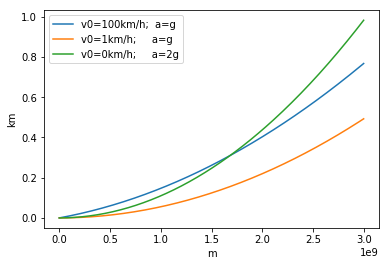

In [5]:
#Array with the time values to plot, Note phval is esentially a np.darray
time_steps = pyu.phval(np.linspace(0,10.,200),"s")

#Diffeerent x(t) function for different initial conditions
x1 = distance(0*km, 100*km/h, g)
x2 = distance(0*km, km/h, g)
x3 = distance(0*km, km/h, 2.*g)

#Compute the distance for all the time steps
y1 = x1(time_steps)
y2 = x2(time_steps)
y3 = x3(time_steps)

#Plot in kilometers and seconds
#You can just change x_units and y_units to show the result in different units. 
x_units = "m"
y_units = "km"
plt.plot(time_steps.val_u(x_units), y1.val_u(y_units), label = "v0=100km/h;  a=g")
plt.plot(time_steps.val_u(x_units), y2.val_u(y_units), label = "v0=1km/h;     a=g")
plt.plot(time_steps.val_u(x_units), y3.val_u(y_units), label = "v0=0km/h;     a=2g")
plt.xlabel(x_units)
plt.ylabel(y_units)
plt.legend()
plt.show()